# House Prices: Advanced Regression Techniques

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load datasets in pandas.dataframe
df_train = pd.read_csv('data/train.csv')
df_test  = pd.read_csv('data/test.csv')
df_all   = pd.concat([df_train, df_test]).reset_index(drop=True)

In [3]:
# view data statistics
print('Number of Training Examples = {}'.format(df_train.shape[0]))
print('Number of Test Examples = {}'.format(df_test.shape[0]))
print('Number of All Examples = {}\n'.format(df_all.shape[0]))
print('Training X Shape = {}'.format(df_train.shape))
print('Training y Shape = {}\n'.format(df_train['SalePrice'].shape[0]))
print('Test X Shape = {}'.format(df_test.shape))
print('Test y Shape = {}\n'.format(df_test.shape[0]))
print('All X Shape = {}'.format(df_all.shape))
print('All y Shape = {}\n'.format(df_all.shape[0]))

#df_train.info()
#df_train.head(10)
#df_train.sample(8)
#df_all['SalePrice'].head(2919)

Number of Training Examples = 1460
Number of Test Examples = 1459
Number of All Examples = 2919

Training X Shape = (1460, 81)
Training y Shape = 1460

Test X Shape = (1459, 80)
Test y Shape = 1459

All X Shape = (2919, 81)
All y Shape = 2919



### Features

    SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area

    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade

    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality    
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system

    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality

    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet

    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $ Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale

In [4]:
# Missing Values
def print_missing_values(df):
    no = 0
    for col in df.columns.tolist():
        miss_count = df[col].isnull().sum()
        if miss_count:
            no+=1
            print('\t{} \t{:<12} {:>8}/{} \t{:.2%} \t{}'.format(no, col, miss_count, len(df), miss_count/len(df), df[col].dtype))
    print('Total missing features: {}  \n'.format(no))

In [5]:
print_missing_values(df_all)

	1 	Alley            2721/2919 	93.22% 	object
	2 	BsmtCond           82/2919 	2.81% 	object
	3 	BsmtExposure       82/2919 	2.81% 	object
	4 	BsmtFinSF1          1/2919 	0.03% 	float64
	5 	BsmtFinSF2          1/2919 	0.03% 	float64
	6 	BsmtFinType1       79/2919 	2.71% 	object
	7 	BsmtFinType2       80/2919 	2.74% 	object
	8 	BsmtFullBath        2/2919 	0.07% 	float64
	9 	BsmtHalfBath        2/2919 	0.07% 	float64
	10 	BsmtQual           81/2919 	2.77% 	object
	11 	BsmtUnfSF           1/2919 	0.03% 	float64
	12 	Electrical          1/2919 	0.03% 	object
	13 	Exterior1st         1/2919 	0.03% 	object
	14 	Exterior2nd         1/2919 	0.03% 	object
	15 	Fence            2348/2919 	80.44% 	object
	16 	FireplaceQu      1420/2919 	48.65% 	object
	17 	Functional          2/2919 	0.07% 	object
	18 	GarageArea          1/2919 	0.03% 	float64
	19 	GarageCars          1/2919 	0.03% 	float64
	20 	GarageCond        159/2919 	5.45% 	object
	21 	GarageFinish      159/2919 	5.45% 	object
	22 	GarageQ

# Filling NA

In [6]:
# Filling features [0 None Avg  ...]
fil_val_int = 0
fil_val_str = '---'

In [7]:
# basement features
for feature in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']:
    df_all[feature] = df_all[feature].fillna(fil_val_int)
for feature in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', ]:
    df_all[feature] = df_all[feature].fillna(fil_val_str)

# garage features
for feature in ['GarageArea', 'GarageCars', 'GarageYrBlt']:
    df_all[feature] = df_all[feature].fillna(fil_val_int)
for feature in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df_all[feature] = df_all[feature].fillna(fil_val_str)

print_missing_values(df_all)

	1 	Alley            2721/2919 	93.22% 	object
	2 	Electrical          1/2919 	0.03% 	object
	3 	Exterior1st         1/2919 	0.03% 	object
	4 	Exterior2nd         1/2919 	0.03% 	object
	5 	Fence            2348/2919 	80.44% 	object
	6 	FireplaceQu      1420/2919 	48.65% 	object
	7 	Functional          2/2919 	0.07% 	object
	8 	KitchenQual         1/2919 	0.03% 	object
	9 	LotFrontage       486/2919 	16.65% 	float64
	10 	MSZoning            4/2919 	0.14% 	object
	11 	MasVnrArea         23/2919 	0.79% 	float64
	12 	MasVnrType         24/2919 	0.82% 	object
	13 	MiscFeature      2814/2919 	96.40% 	object
	14 	PoolQC           2909/2919 	99.66% 	object
	15 	SalePrice        1459/2919 	49.98% 	float64
	16 	SaleType            1/2919 	0.03% 	object
	17 	Utilities           2/2919 	0.07% 	object
Total missing features: 17  



In [8]:
# some categorical features
features = ['Fence', 'FireplaceQu', 'MasVnrType']
df_all[features] = df_all[features].fillna(fil_val_str)
df_all['MasVnrArea'] = df_all['MasVnrArea'].fillna(fil_val_int)

# delete non-informative features (more 90% missing val)
features = ['Alley', 'PoolQC', 'MiscFeature']
df_all = df_all.drop(features, axis=1)

print_missing_values(df_all)

	1 	Electrical          1/2919 	0.03% 	object
	2 	Exterior1st         1/2919 	0.03% 	object
	3 	Exterior2nd         1/2919 	0.03% 	object
	4 	Functional          2/2919 	0.07% 	object
	5 	KitchenQual         1/2919 	0.03% 	object
	6 	LotFrontage       486/2919 	16.65% 	float64
	7 	MSZoning            4/2919 	0.14% 	object
	8 	SalePrice        1459/2919 	49.98% 	float64
	9 	SaleType            1/2919 	0.03% 	object
	10 	Utilities           2/2919 	0.07% 	object
Total missing features: 10  



In [9]:
# Filling missing values in categorical features with the mode value of neighborhood and house type
for feature in ['Electrical', 'Exterior1st', 'Exterior2nd', 'Functional', 'KitchenQual', 'MSZoning', 'SaleType', 'Utilities']:
    df_all[feature] = df_all.groupby(['Neighborhood', 'MSSubClass'])[feature].apply(lambda x: x.fillna(x.mode()[0]))

# Filling the missing values in LotFrontage with the median of neighborhood
df_all['LotFrontage'] = df_all.groupby(['Neighborhood'])['LotFrontage'].apply(lambda x: x.fillna(x.median()))

print_missing_values(df_all)

	1 	SalePrice        1459/2919 	49.98% 	float64
Total missing features: 1  



## Create new aggregate features

In [10]:
# _SumAreaLGP = PoolArea + GarageArea + GrLivArea
df_all['_SumAreaLGP'] = df_all['GrLivArea'] + df_all['GarageArea'] + df_all['PoolArea']
df_all['_SumPorch']   = df_all['WoodDeckSF']+df_all['OpenPorchSF']+df_all['EnclosedPorch']+df_all['3SsnPorch']+df_all['ScreenPorch']

# print (df_all[['_SumAreaLGP','_SumAreaLGP_', '_SumPorch']])

# SPLIT & ANALYSYS: categorical - numerical 

In [11]:
def slit_df(all_data):
    return all_data.loc[:1459], all_data.loc[1460:].drop(['SalePrice'], axis=1)

In [12]:
col_cat  = [i for i in df_all.columns if df_all.dtypes[i] == 'object']
col_num  = [i for i in df_all.columns if df_all.dtypes[i] != 'object']

col_num_ = col_num.copy()
col_num_.remove('SalePrice')

## numerical analysis

In [13]:
def print_corr_matrix (df, cols):
    matrix_corr = df[cols].corr()    
    plt.figure(figsize=(20,12))
    sns.heatmap(matrix_corr, vmin=0.0, vmax=1.0, annot=True, cmap="Reds")

    
def print_corr_matrix_top_col (df, cols, main_cols_count = 4):
    matr_corr = df[cols].corr()
    main_cols = matr_corr.nlargest(main_cols_count,'SalePrice')['SalePrice'].index
    main_corr = matr_corr.loc[main_cols, main_cols]
    plt.figure(figsize=(20,12))
    sns.heatmap(main_corr, annot=True, cmap="Reds")
    
    return main_cols.tolist()

    
def print_corr_matrix_more_than (df, cols, corr_val = 0.0):
    matr_corr = df[cols].corr()
    main_cols = matr_corr.index[ abs(matr_corr['SalePrice'] >= corr_val) ]
    main_corr = df[main_cols].corr()    
    plt.figure(figsize=(20,12))
    sns.heatmap(main_corr, annot=True, cmap="Reds")
    
    return main_cols.tolist()
    
    
"""
df_all_corr  = df_all.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_all_corr.drop(df_all_corr.iloc[1::2].index, inplace=True)
df_all_corr_ = df_all_corr.drop(df_all_corr[df_all_corr['Correlation Coefficient'] == 1.0].index)

df_all_corr_[df_all_corr['Feature 1'] == 'SalePrice']
"""

'\ndf_all_corr  = df_all.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()\ndf_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: \'Correlation Coefficient\'}, inplace=True)\ndf_all_corr.drop(df_all_corr.iloc[1::2].index, inplace=True)\ndf_all_corr_ = df_all_corr.drop(df_all_corr[df_all_corr[\'Correlation Coefficient\'] == 1.0].index)\n\ndf_all_corr_[df_all_corr[\'Feature 1\'] == \'SalePrice\']\n'

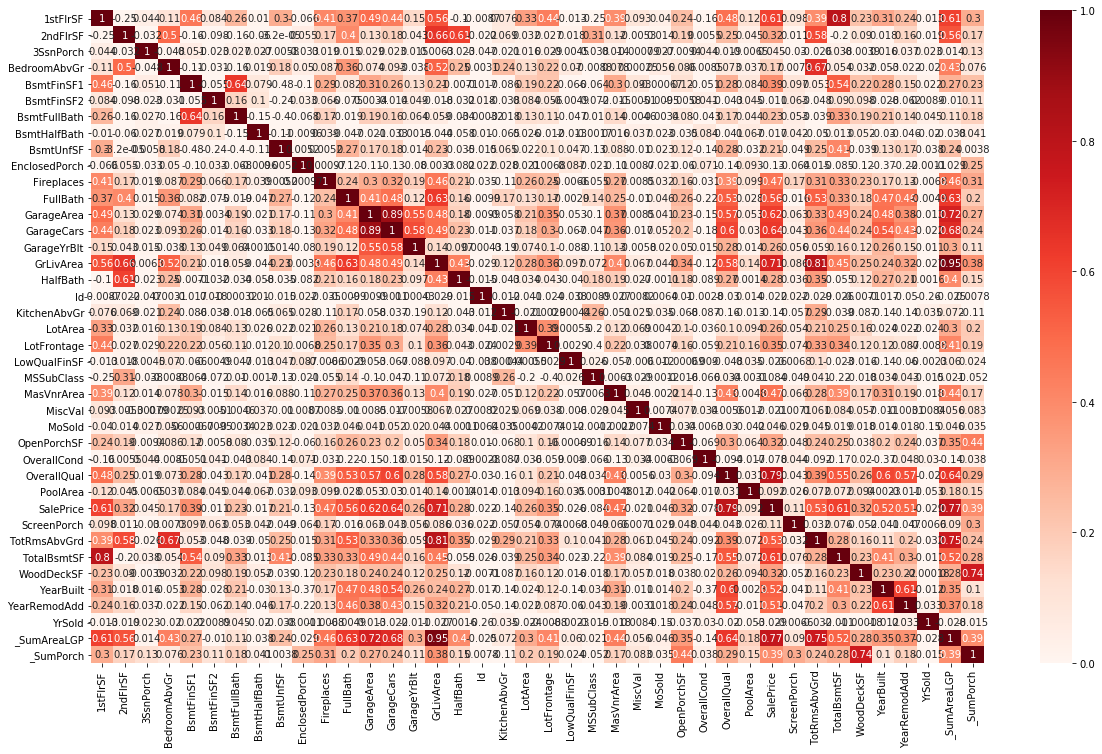

In [14]:
print_corr_matrix(df_all, col_num)

In [15]:
df_train, df_test = slit_df(df_all)

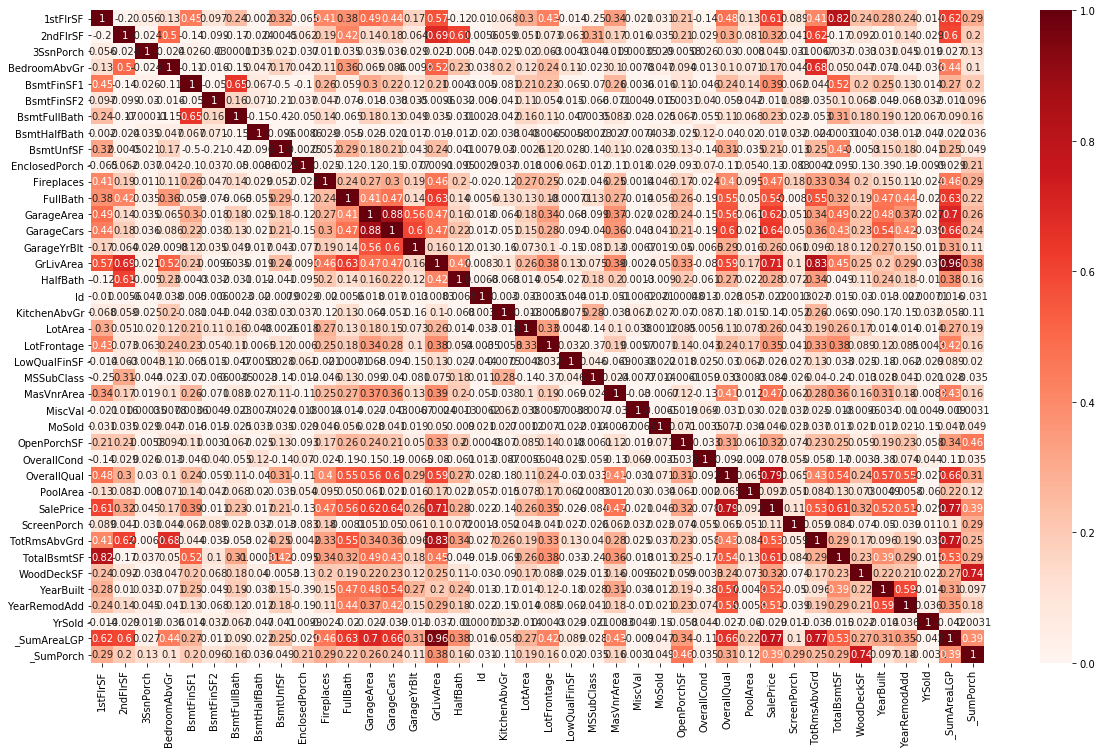

In [16]:
print_corr_matrix(df_train, col_num)

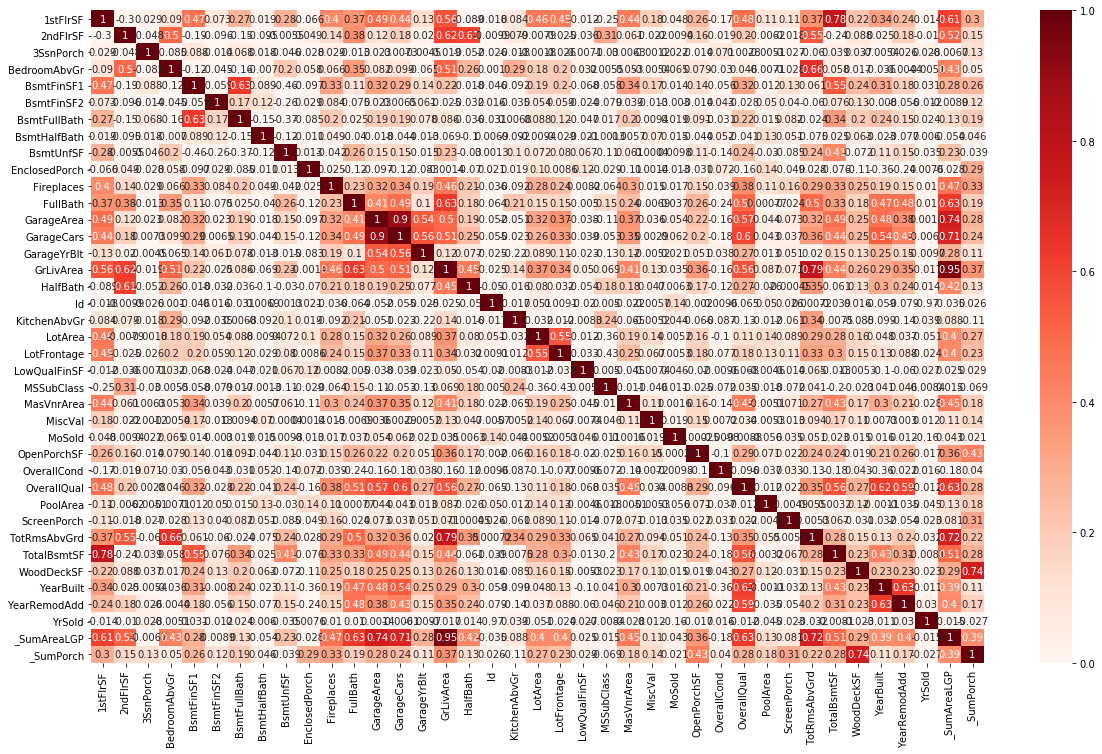

In [17]:
print_corr_matrix(df_test, col_num_)

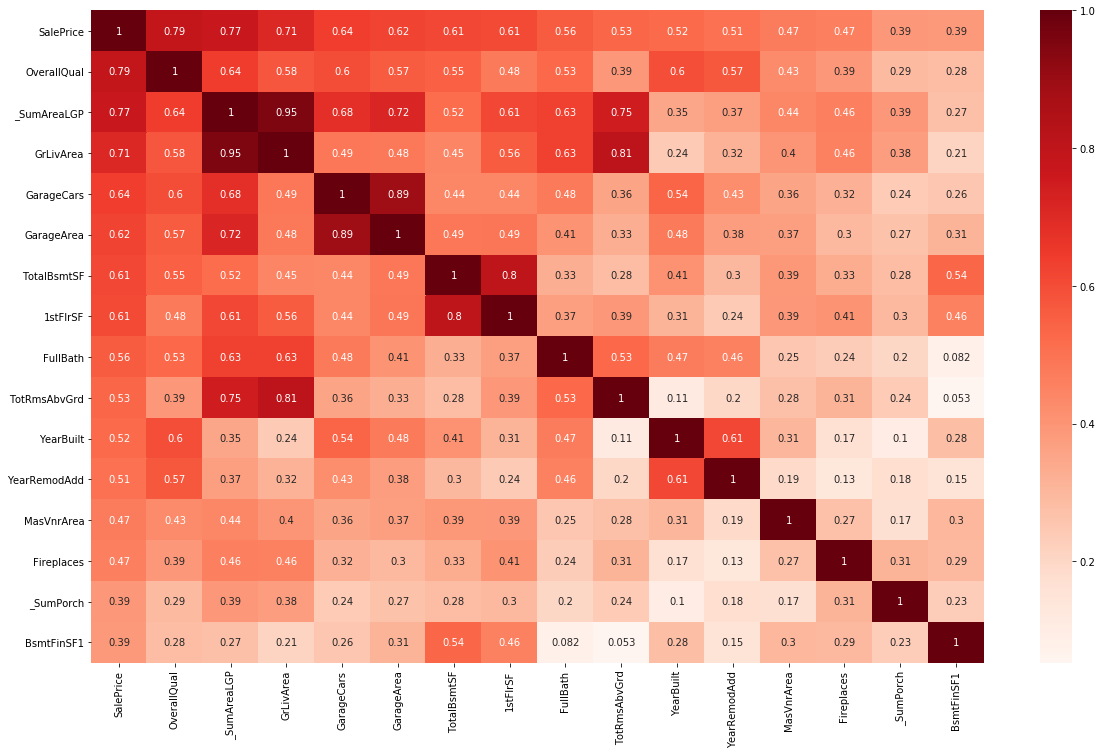

In [18]:
main_cols_num = print_corr_matrix_top_col (df_all, col_num, 16)

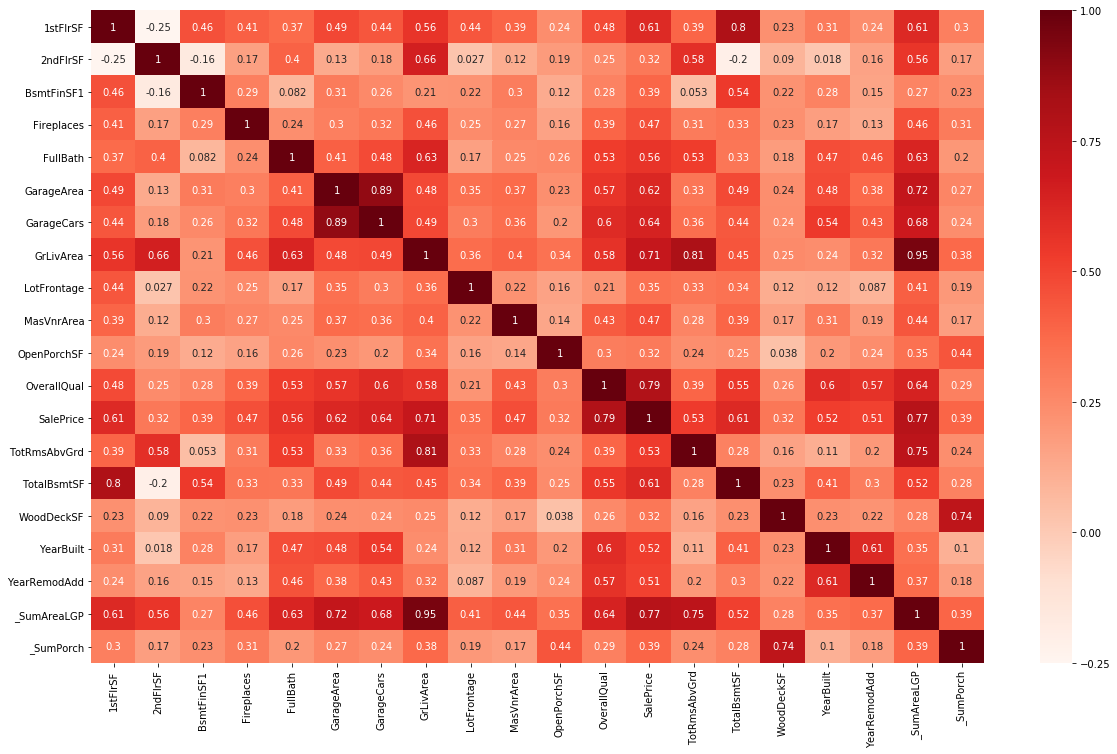

In [19]:
_ = print_corr_matrix_more_than (df_all, col_num, 0.3)

## Drop dependent features (redundancy)

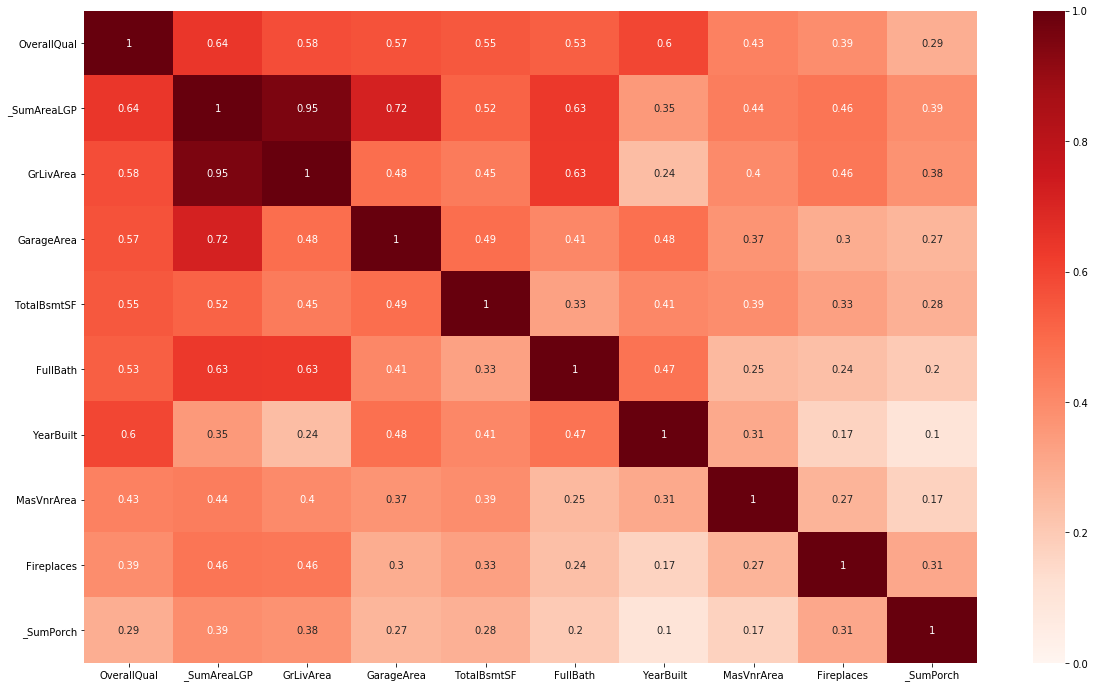

In [20]:
# drop 
main_cols_num.remove('SalePrice')

main_cols_num.remove('GarageCars')
main_cols_num.remove('TotRmsAbvGrd')
main_cols_num.remove('1stFlrSF')
main_cols_num.remove('BsmtFinSF1')
main_cols_num.remove('YearRemodAdd')

print_corr_matrix(df_all, main_cols_num)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


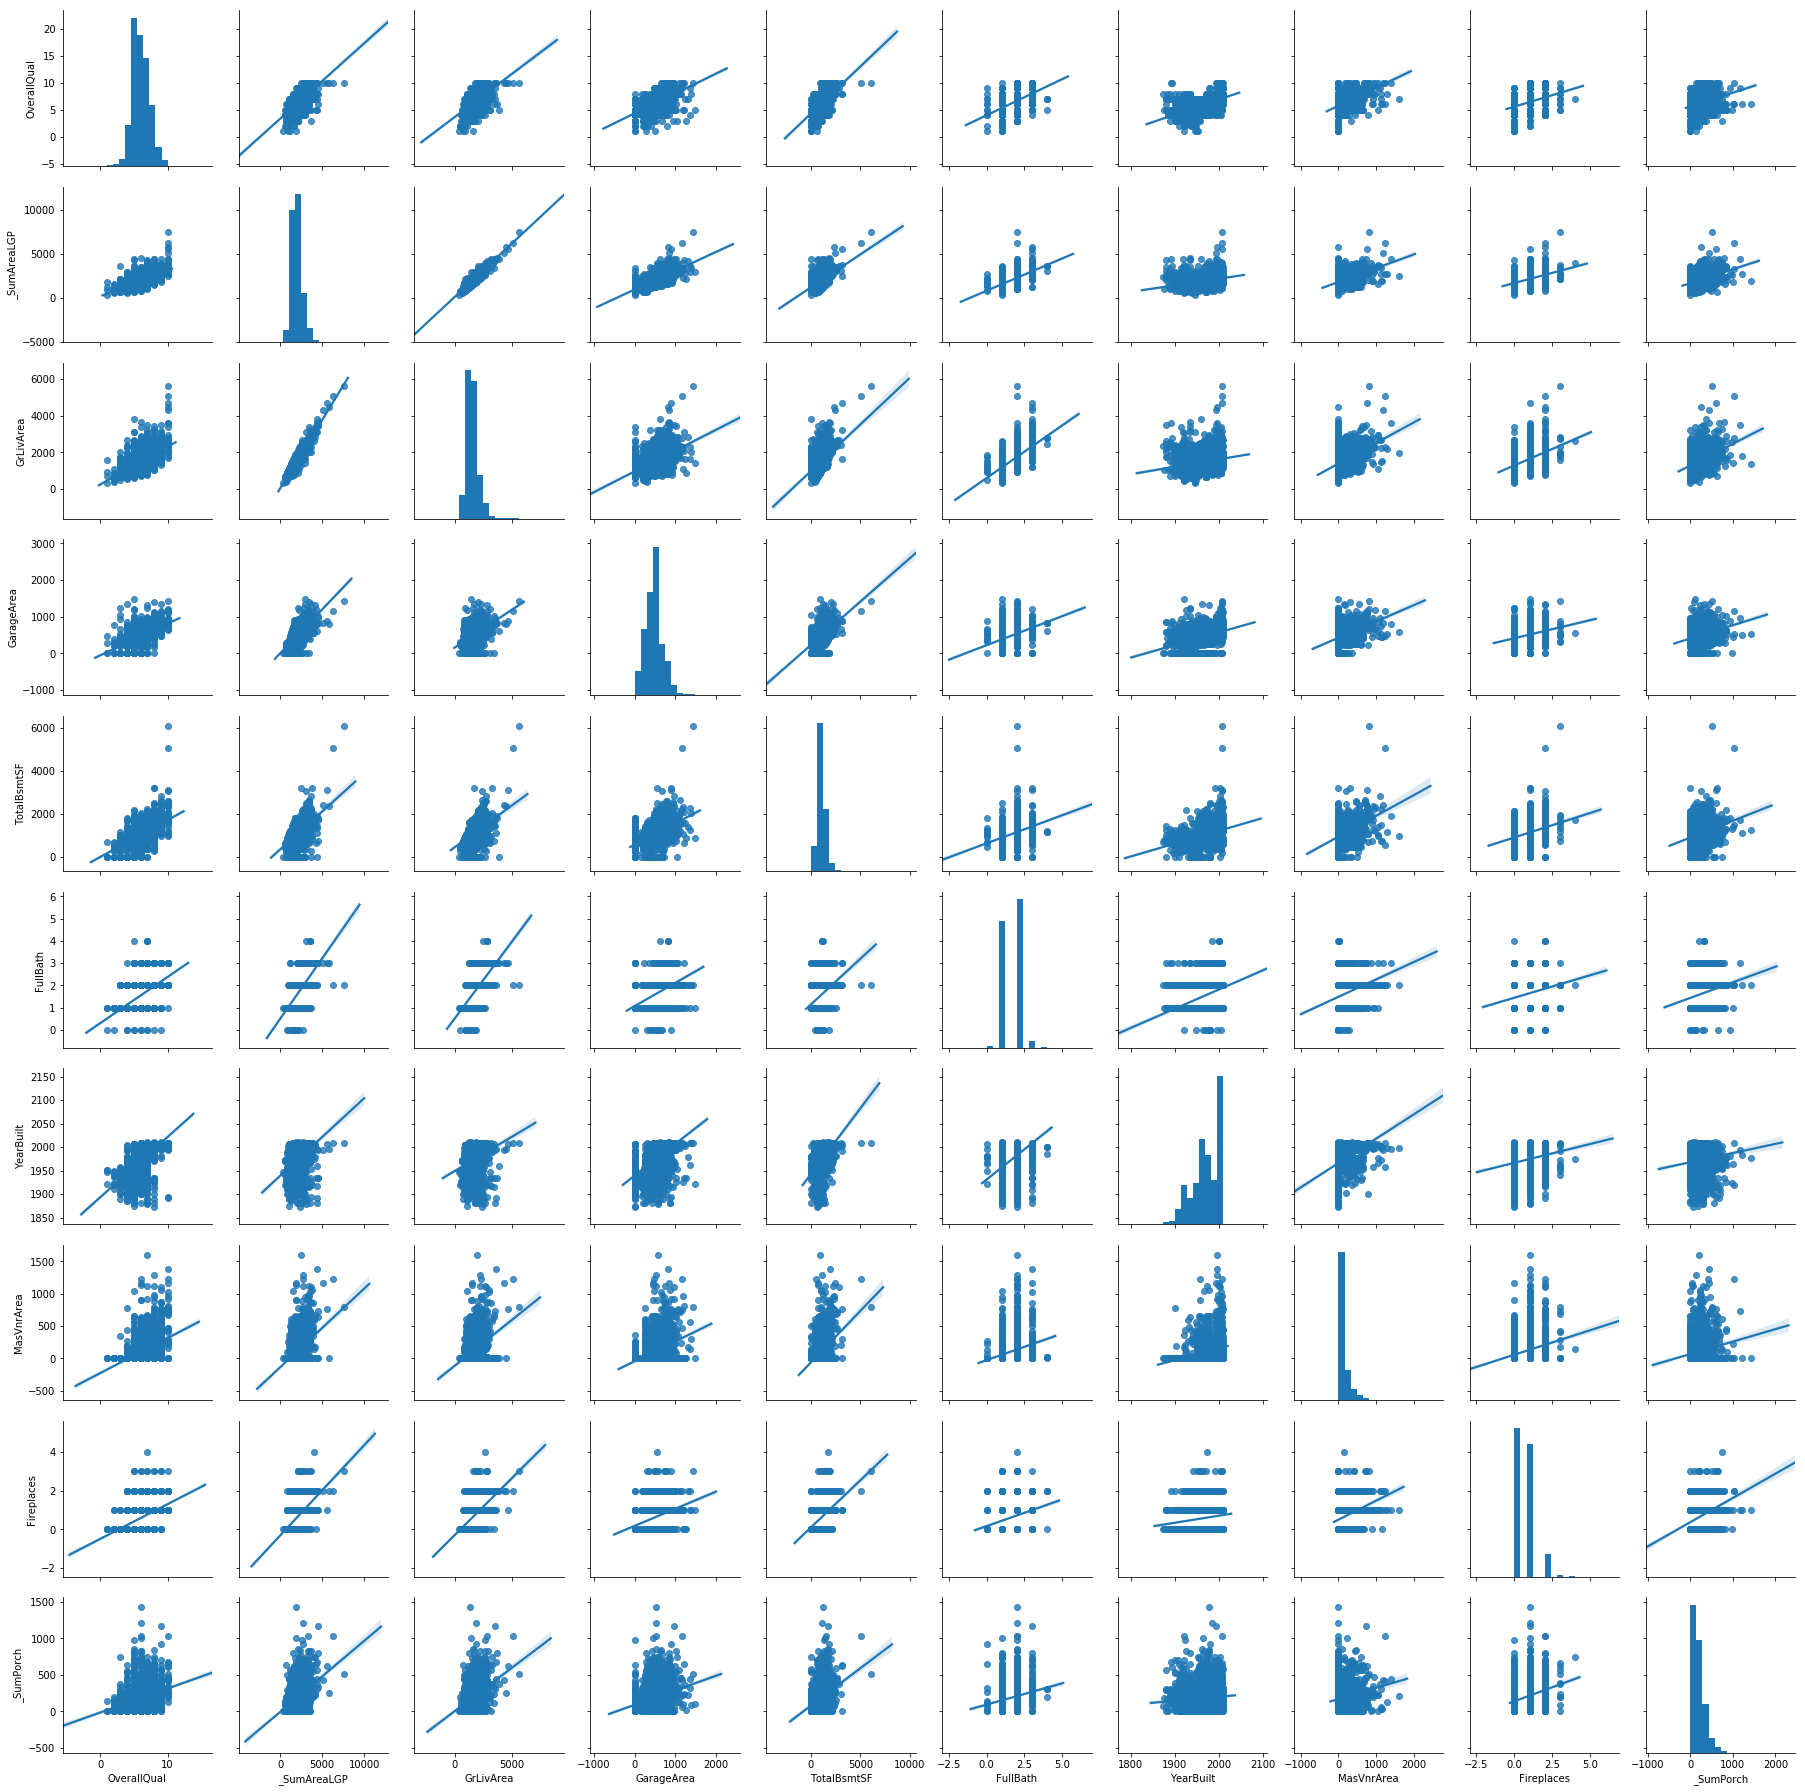

In [21]:
# sns_plot = sns.pairplot (df_all[main_cols_num])
# sns_plot.savefig('pairplot.png')

# sns.pairplot(df, kind="reg")
# sns.pairplot(df, kind="scatter")
# sns.pairplot(df, kind="scatter", hue="species", markers=["o", "s", "D"], palette="Set2")
# sns.pairplot(df, kind="scatter", hue="species", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))

sns.pairplot (df_all[main_cols_num], kind="reg", palette="Set2")

## categorical analysis

In [22]:
from sklearn.preprocessing import LabelEncoder

for col in col_cat:
    LE = LabelEncoder() 
    df_all[col] = LE.fit_transform ( list(df_all[col].values) )
    
col_cat.append('SalePrice')

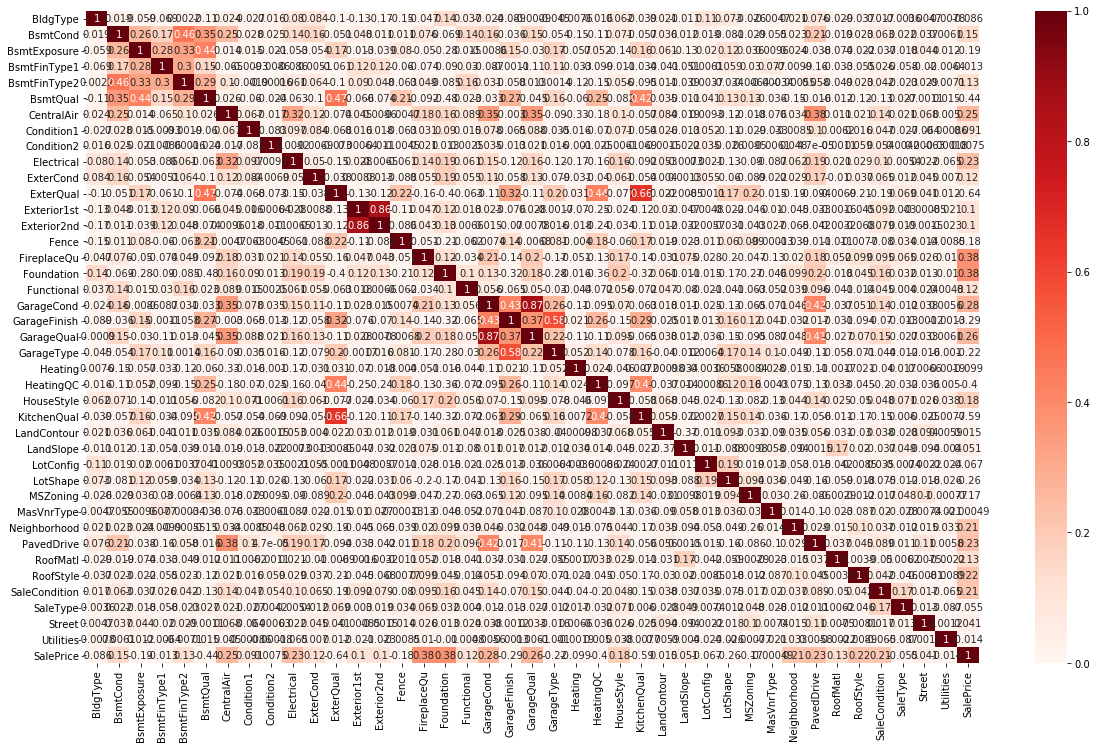

In [23]:
print_corr_matrix(df_all, col_cat)

In [24]:
df_train, df_test = slit_df(df_all)

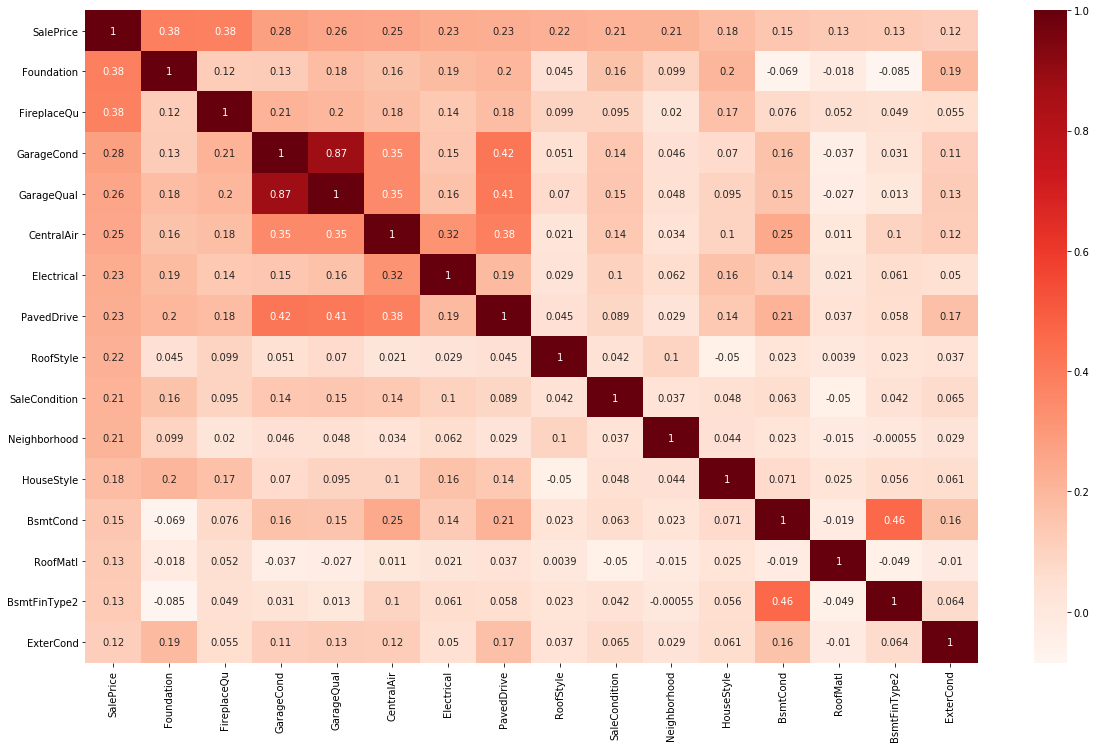

In [25]:
main_cols_cat = print_corr_matrix_top_col (df_all, col_cat, 16)

## Drop dependent features (redundancy)

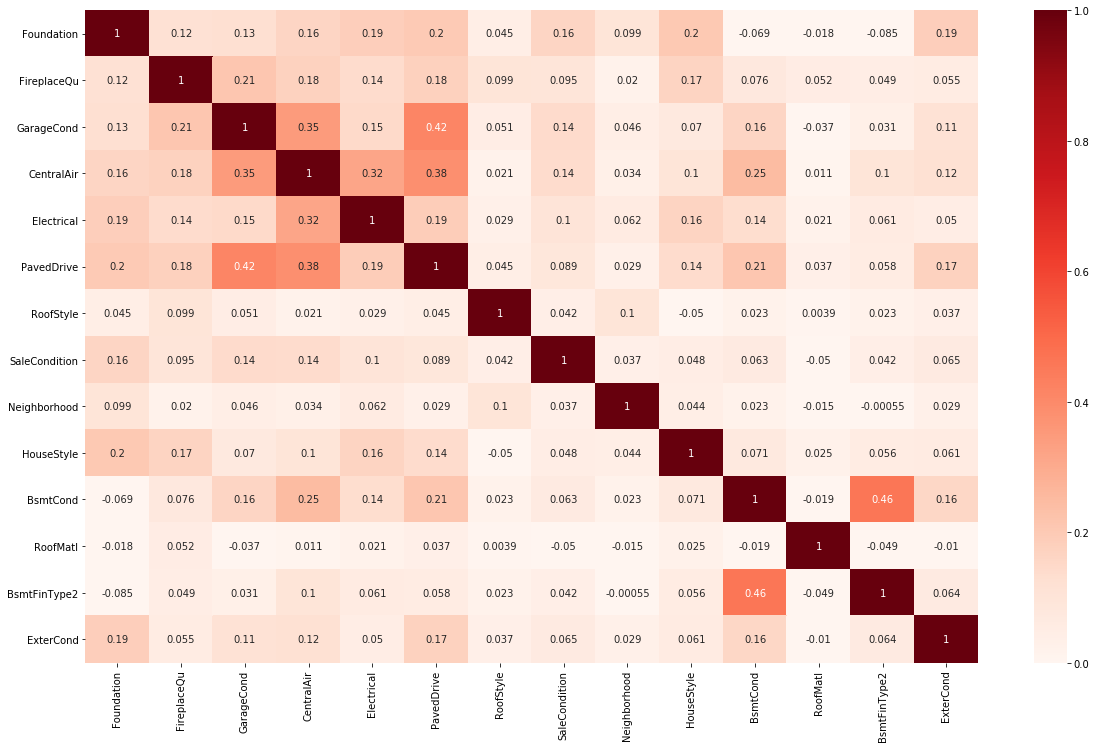

In [26]:
# drop 
main_cols_cat.remove('SalePrice')

main_cols_cat.remove('GarageQual')

print_corr_matrix(df_all, main_cols_cat)

## Outliers

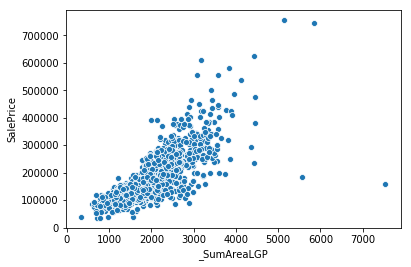

In [27]:
sns.scatterplot (df_train['_SumAreaLGP'], df_train['SalePrice'])

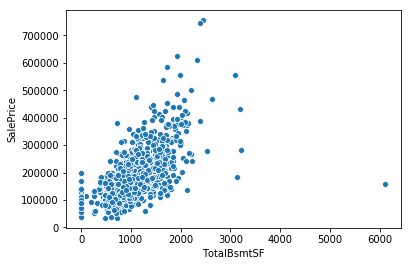

In [28]:
sns.scatterplot (df_train['TotalBsmtSF'], df_train['SalePrice'])

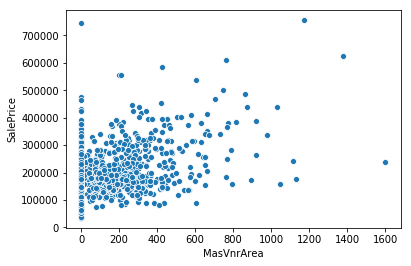

In [29]:
sns.scatterplot (df_train['MasVnrArea'], df_train['SalePrice'])

In [30]:
# drop Outliers values in _SumAreaLGP,'TotalBsmtSF','MasVnrArea'

ind1 = df_train['_SumAreaLGP'][df_train['_SumAreaLGP']>5000].index
ind2 = df_train['TotalBsmtSF'][df_train['TotalBsmtSF']>4000].index
ind3 = df_train['MasVnrArea' ][df_train['MasVnrArea' ]>1200].index

ind = np.unique (np.concatenate((ind1, ind2, ind3)))
df_train = df_train.drop(ind, axis=0)

# Linear Regression

In [31]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import ensemble


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [32]:
main_cols = main_cols_num + main_cols_cat

X = df_train[main_cols]
Y = np.log(df_train['SalePrice'])

In [33]:
def build_submmision_file (estimator, fname='submission.csv'):
    predict = estimator.predict(df_test[main_cols])
    df_subm = pd.DataFrame()
    df_subm['Id'] = df_test['Id']
    df_subm['SalePrice'] = np.exp(predict)
   #df_subm['SalePrice'] = np.around( np.exp(predict), decimals=-2 ) 
    df_subm.to_csv(fname, index=False)
    
def print_model_metrics (est, X, Y):
    score = np.sqrt(-cross_val_score(est, X, Y, scoring='neg_mean_squared_error', cv=5))
    print ( "MSE\t" , np.sqrt ( metrics.mean_squared_error(Y, est.predict(X)))  )
    print ( "RMSE\t", score.mean()  ) 
    print ( "STD\t" , score.std() )
   #print ( "MAE\t", cross_val_score (est, X, Y, cv=5, scoring='neg_mean_absolute_error').mean() ) 
   #print ( "MSE\t", np.sqrt ( np.abs ( cross_val_score(est, X, Y, cv=5, scoring='neg_mean_squared_error').mean())) ) 

In [34]:
LRM = linear_model.LinearRegression()
LRM.fit (X,Y)
print_model_metrics   (LRM, X, Y)
build_submmision_file (LRM, "submission.LRM.csv")

MSE	 0.14128717321167775
RMSE	 0.14551527822736335
STD	 0.004387037929327095


In [35]:
ADR = linear_model.ARDRegression()
ADR.fit (X,Y)
print_model_metrics   (ADR, X, Y)
build_submmision_file (ADR, "submission.ADR.csv")

MSE	 0.20060421738791165
RMSE	 0.19997456437124514
STD	 0.011009291304344518


In [36]:
LMR = linear_model.Ridge()
LMR.fit (X,Y)
print_model_metrics   (LMR, X, Y)
build_submmision_file (LMR, "submission.LMR.csv")

MSE	 0.14128781702387305
RMSE	 0.145504925189681
STD	 0.00436434875502244


In [37]:
GBR = ensemble.GradientBoostingRegressor()
GBR.fit (X,Y)
print_model_metrics   (GBR, X, Y)
build_submmision_file (GBR, "submission.GBR.csv")

MSE	 0.10657939803967356
RMSE	 0.14419124036726239
STD	 0.004569252004794661


In [38]:
RFR = ensemble.RandomForestRegressor()
RFR.fit (X,Y)
print_model_metrics   (RFR, X, Y)
build_submmision_file (RFR, "submission.RFR.csv")

MSE	 0.06418785479859464
RMSE	 0.15332175208074847
STD	 0.005878511371694162


In [39]:
ETR = ensemble.ExtraTreesRegressor()
ETR.fit (X,Y)
print_model_metrics   (ETR, X, Y)
build_submmision_file (ETR, "submission.ETR.csv")

MSE	 0.004358435640948541
RMSE	 0.15221798216509125
STD	 0.008113713966524352
